In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import time

t0 = time.time()

In [4]:
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import json
import scipy.stats as stats
from matplotlib.patches import Ellipse

from aml_dl.mdn.model.mdn_push_fwd_model import MDNPushFwdModel
from config.shape_db import *
import matplotlib.pyplot as plt
import tf.transformations as tfm
shape_db = ShapeDB()

#from aml_data_collec_utils.core.data_manager import DataManager
#from aml_dl.mdn.utilities.get_data_from_files import get_data_from_files

In [5]:
sess = tf.InteractiveSession()
    
adam_params = {
    'type': 'adam',
    'params': {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'use_locking': False}
}

network_params = {
    'dim_input': 61, 
    'dim_output': 3,
    'n_hidden': 400,
    'k_mixtures': 200,
    'batch_size': 25,
    'write_summary': False,
    'learning_rate': 0.00005,
    'load_saved_model': False,
    'optimiser': adam_params,
    'device': '/cpu:0',
    'dropout_prob': 0.8,
    'weight_multiplier': 1.0, # changed iteratively later on only if halfweightValidation used (for dropout)
    'weight_reg_coef': 0.001, # change to factor weight size regularization
    'max_weight_mag': 1000, # set high to turn off weight contraining
}

forward_model = MDNPushFwdModel(sess=sess, network_params=network_params)
forward_model.init_model()

In [6]:
NEPOCH = 2000

In [7]:
json_filepath = '/home/harry/Projects/surface_compare/delrin/rect1_json/data_training_with_shapeBounds_andForce.json'
with open(json_filepath) as data_file:    
		data_rect1 = json.load(data_file)
        
json_filepath = '/home/harry/Projects/surface_compare/delrin/rect2_json/data_training_with_shapeBounds_andForce.json'
with open(json_filepath) as data_file:    
		data_rect2 = json.load(data_file)
        
json_filepath = '/home/harry/Projects/surface_compare/delrin/rect3_json/data_training_with_shapeBounds_andForce.json'
with open(json_filepath) as data_file:    
		data_rect3 = json.load(data_file)

        
#----------------------CHANGE FOR DIFFERENT VAL SET---------------------------------        
train_data = []
train_data.extend(data_rect2)
train_data.extend(data_rect3)

val_data = []
val_data.extend(data_rect1)

shape_ids = ['rect1']

dataNew = []
for i in range(len(data_rect1)):
    if (train_data[i][13] == 10):
        dataNew.append(data_rect1[i])
data_rect1 = dataNew
#----------------------------------------------------------------------------------------

# use lens to seperate sets for visualization
len1 = len(data_rect1)
len2 = len(data_rect2)
len3 = len(data_rect3)
# removes all velocity cases
dataNew = []
for i in range(len(train_data)):
    if (train_data[i][13] == 10):
        dataNew.append(train_data[i])
train_data = dataNew

dataNew = []
for i in range(len(val_data)):
    if (val_data[i][13] == 10):
        dataNew.append(val_data[i])
val_data = dataNew

In [8]:
# rescale (min max normalise)
all_data = train_data
all_data.extend(val_data)
all_data = np.array(all_data)
mins = np.amin(all_data, axis = 0)
maxs = np.amax(all_data, axis = 0)

train_data = (train_data-mins)/(maxs-mins)
val_data = (val_data-mins)/(maxs-mins)

Ymins = np.r_[mins[7:10]] # 7,8,9
Ymaxs = np.r_[maxs[7:10]]
Xmins = np.r_[mins[0:7], mins[10:13], mins[14:65]] # 1,2,3,4,5,6,10,11,12,14
Xmaxs = np.r_[maxs[0:7], maxs[10:13], maxs[14:65]]
    
dataX = train_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
dataY = train_data[:, [7,8, 9]] # end parameters
    
dataX_val = val_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
dataY_val = val_data[:, [7,8, 9]] # end parameters

dataX_val1 = dataX_val[0:len1]
dataY_val1 = dataY_val[0:len1]
dataY_val2 = dataY_val[len1:len1+len2]
dataY_val3 = dataY_val[len1+len2:len1+len2+len3]
print np.shape(train_data), '= train_data'

(1188, 65) = train_data


/home/harry/.virtualenvs/robotics/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/harry/.virtualenvs/robotics/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


0
25
50
75
100


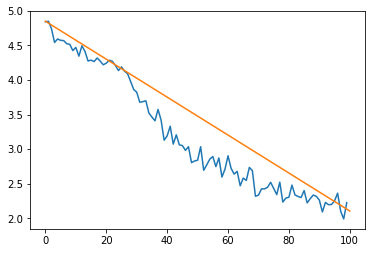

125
150
175
200


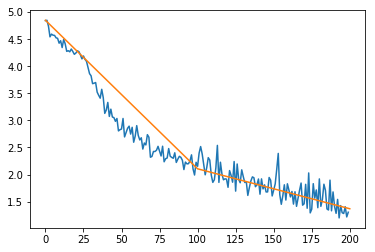

225
250
275
300


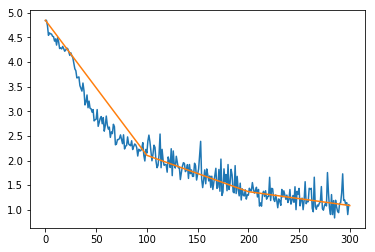

325
350
375
400


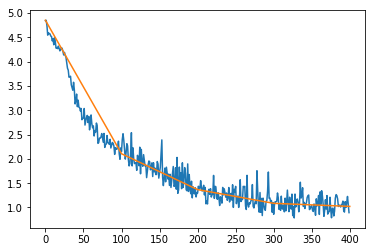

425
450
475
500


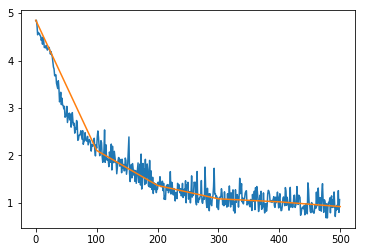

525
550
575
600


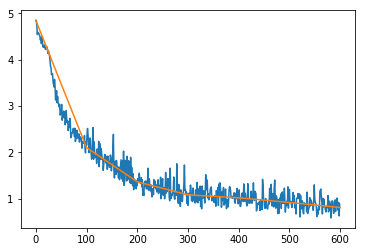

625
650
675
700


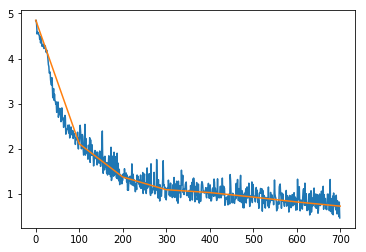

725
750
775
800


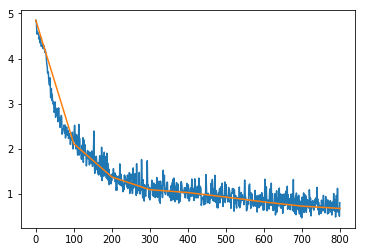

825
850
875
900


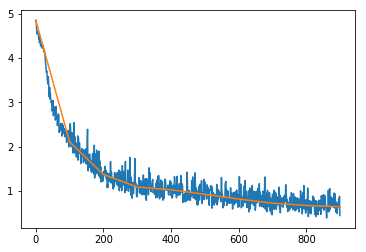

925
950
975
1000


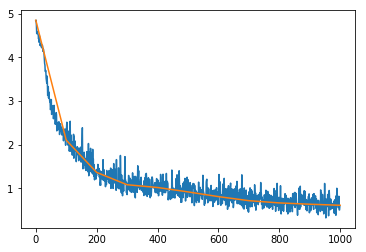

1025
1050
1075
1100


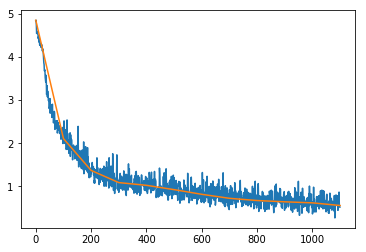

1125
1150
1175
1200


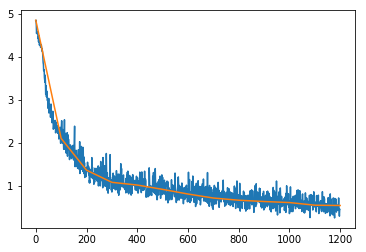

1225
1250
1275
1300


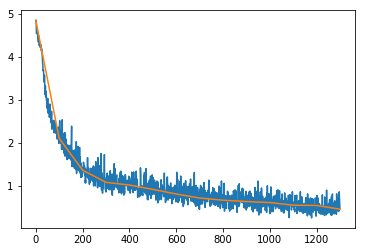

1325
1350
1375
1400


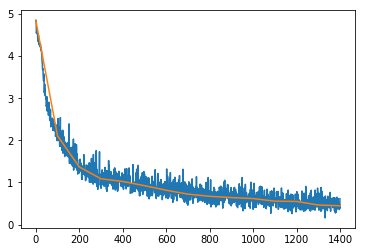

1425
1450
1475
1500


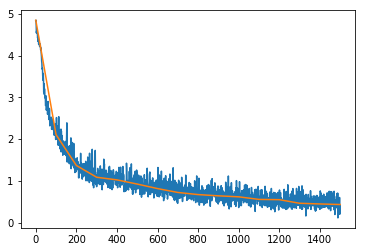

1525
1550
1575
1600


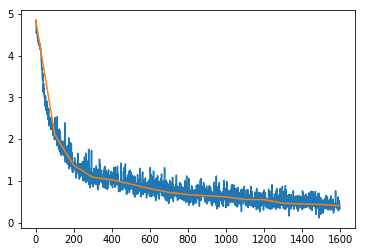

1625
1650
1675
1700


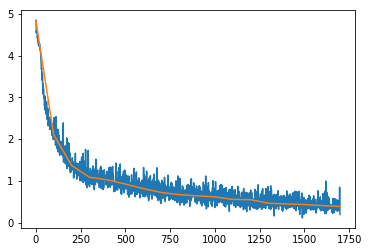

1725
1750
1775
1800


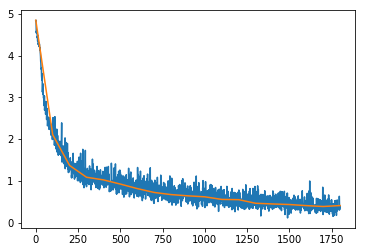

1825
1850
1875
1900


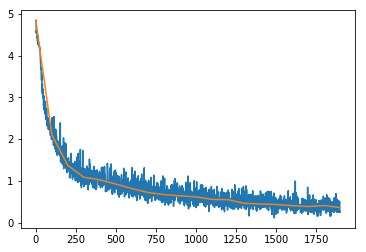

1925
1950
1975


In [9]:
sess.run(tf.global_variables_initializer())
val_step = 100
stoch_sample_size = 50   
loss = np.zeros(NEPOCH)
val_loss = np.zeros(NEPOCH/val_step)

with tf.device('/cpu:0'):
    train_step = forward_model._net_ops['train']
    loss_op  = forward_model._net_ops['loss']
    bs = forward_model._params['batch_size']
    val_counter = 0
    counter = 0
    
    for i in range(NEPOCH): 
        if (i%25==0):
            print i
        b_start_counter = 0
        b_end_counter = bs
        
        feed_dict = {forward_model._net_ops['x']: dataX[b_start_counter:b_end_counter], forward_model._net_ops['y']: dataY[b_start_counter:b_end_counter]}
        feed_dict_val = {forward_model._net_ops['x']: dataX_val[0:bs], forward_model._net_ops['y']: dataY_val[0:bs]}
        
        for j in range(int(len(dataX))/bs):
            _, loss[i] = forward_model._sess.run([train_step, loss_op], feed_dict=feed_dict)
            
            b_start_counter += bs
            b_end_counter += bs
            #shift batch on
            feed_dict = {forward_model._net_ops['x']: dataX[b_start_counter:b_end_counter], forward_model._net_ops['y']: dataY[b_start_counter:b_end_counter]}
        
        if (i%val_step == 0):
            valSumSum = 0
            for j in range(int(len(dataX_val))):
                valSum = 0
                feed_dict_val = {forward_model._net_ops['x']: [dataX_val[j]], forward_model._net_ops['y']: [dataY_val[j]]}
                for l in range(stoch_sample_size):
                    valSum += forward_model._sess.run(loss_op, feed_dict=feed_dict_val)
                valSumSum += valSum/stoch_sample_size
            val_loss[val_counter] = valSumSum/len(dataX_val)
            val_counter += 1
            
        #reshuffle after epoch to avoid same cycle
        np.random.shuffle(train_data)
        dataX = train_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
        dataY = train_data[:, [7,8, 9]] # end parameters
            
        np.random.shuffle(val_data)
        dataX_val = val_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
        dataY_val = val_data[:, [7,8, 9]] # end parameters
        
        if (i%val_step == 0) and (i>1):
            #print loss[i]
            #print val_loss[i]
            plt.plot(range(0,i), loss[0:i], label = "loss")
            plt.plot(range(0,i+1,val_step), val_loss[0:val_counter], label = "validation loss")
            plt.show()
            
        counter +=1
        #print 'epoch: ',i+1, ', loss: ', round(loss[i], 3), ', last calculated val loss: ',round(val_loss[val_counter-1], 3), 'time elapsed: ',round((time.time()-t0)/60), 'minutes' 
        

In [10]:
for n in range(4): 
    shape_id = shape_ids[n]
    probe_radius = 0.004745
    
    if (shape_id == 'ellip1' or shape_id == 'ellip2' or shape_id == 'ellip3' or shape_id == 'butter'):
        shape_polygon = shape_db.shape_db[shape_id]['shape'][0]
    else:
        shape_polygon = shape_db.shape_db[shape_id]['shape']
        shape_polygon.append(shape_polygon[0])
     
    # average over multiple stochastic models to get averaged
    feed_dict = {forward_model._net_ops['x']: dataX_vals[n]}
    
    with tf.device('/cpu:0'):
        ccpredictions_mus = []
    
        for i in range(stoch_sample_size*10):
            mus_op = forward_model._net_ops['mu']
            sigmas_op  = forward_model._net_ops['sigma']
            pis_op = forward_model._net_ops['pi']
    
            out_mus = forward_model._sess.run(mus_op, feed_dict=feed_dict)
            out_sigmas = forward_model._sess.run(sigmas_op, feed_dict=feed_dict)
            out_pis = forward_model._sess.run(pis_op, feed_dict=feed_dict)
    
            concat_out_pis = np.swapaxes(np.array([out_pis, out_pis, out_pis]),0,1) # make shape same as mus
            weighted_mus = out_mus*concat_out_pis
            ccpredictions_mus.append(np.sum(weighted_mus,2).tolist())
    
        sum_avg_err_NN = np.sum(np.mean(np.abs(dataY_vals[n]-np.mean(ccpredictions_mus, axis = 0)), axis = 0))
    
        # de_rescale 
        ccpredictions_mus = (ccpredictions_mus*(Ymaxs-Ymins))+Ymins
        dataX_val = (dataX_vals[n]*(Xmaxs-Xmins))+Xmins  
        dataY_val = (dataY_vals[n]*(Ymaxs-Ymins))+Ymins
        
        ccpredictions_mus_mean = np.mean(ccpredictions_mus, axis = 0)
        ccpredictions_sigmas = np.std(ccpredictions_mus, axis = 0)
        
        #better error measure
        dXYtheta = dataY_val-ccpredictions_mus_mean
        hypoten = []
        for e in range(len(dXYtheta)):
            dist = np.sqrt(np.square(dXYtheta[e][0])+np.square(dXYtheta[e][1]))
            hypoten.append(dist)
        DIST_avg_err_NN = np.mean(hypoten)
        DIST_std_err_NN = np.std(hypoten)
        ROTA_avg_err_NN = np.mean(np.abs(dXYtheta[:,2]))
        ROTA_std_err_NN = np.std(np.abs(dXYtheta[:,2]))
        
    print sum_avg_err_NN, '= sum_avg_err_NN for shape', shape_id
    print DIST_avg_err_NN, '= DIST_avg_err_NN for shape', shape_id
    print DIST_std_err_NN, '= DIST_std_err_NN for shape', shape_id
    print ROTA_avg_err_NN, '= ROTA_avg_err_NN for shape', shape_id
    print ROTA_std_err_NN, '= ROTA_std_err_NN for shape', shape_id
    
    dataX_test = dataX_val
    dataY_test = dataY_val
    counter = 0
    
    if (shape_id!='ellip1' and shape_id!='ellip2' and shape_id!='ellip3'):
        for i in range(len(dataX_test)):
            obj_start = dataX_test[i, [4, 5, 6]]
            transformed_start = rigidtransform(shape_polygon, obj_start)
            plottransformed_obj(transformed_start, 'g', 1.0)
            plottransformed_pusher(dataX_test[i,0], dataX_test[i,1], probe_radius, 'g')

            transformed_end = rigidtransform(shape_polygon, dataY_test[i])
            plottransformed_obj(transformed_end, 'r', 1.0)
            plottransformed_pusher(dataX_test[i,2], dataX_test[i,3], probe_radius, 'r')

            pred = ccpredictions_mus_mean[i] ## uncomment to use convex combination
            pred_sig = ccpredictions_sigmas[i]
            #pred = predictions[i]
    
            xs = np.linspace(pred[0]-pred_sig[0], pred[0]+pred_sig[0], 3)
            ys = np.linspace(pred[1]-pred_sig[1], pred[1]+pred_sig[1], 3)
            thetas = np.linspace(pred[2]-pred_sig[2], pred[2]+pred_sig[2], 3)
    
            for i in xs:
                for j in ys:
                    for l in thetas:
                        transformed_pred = rigidtransform(shape_polygon, [i,j,l])
                        plottransformed_obj(transformed_pred, 'b', 0.2)
                
            transformed_pred = rigidtransform(shape_polygon, pred)
            plottransformed_obj(transformed_pred, 'b', 1)
                
            print 'NN'
            plt.show()            
    else:
        for i in range(len(dataX_test)):
            obj_startX = dataX_test[i, [4]]
            obj_startY = dataX_test[i, [5]]
            obj_startTheta = dataX_test[i, [6]]
            obj_endX = dataY_test[i, [0]]
            obj_endY = dataY_test[i, [1]]
            obj_endTheta = dataY_test[i, [2]]
    
            pred = ccpredictions_mus_mean[i] ## uncomment to use convex combination
            pred_sig = ccpredictions_sigmas[i]
    
            plt.figure(figsize=(4, 4))
    
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((obj_startX, obj_startY), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(obj_startTheta), fill=False, color='g'))
            plottransformed_pusher(dataX_test[i,0], dataX_test[i,1], probe_radius, 'g')
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((obj_endX, obj_endY), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(obj_endTheta), fill=False, color='r'))
            plottransformed_pusher(dataX_test[i,2], dataX_test[i,3], probe_radius, 'r')
    
            xs = np.linspace(pred[0]-pred_sig[0], pred[0]+pred_sig[0], 3)
            ys = np.linspace(pred[1]-pred_sig[1], pred[1]+pred_sig[1], 3)
            thetas = np.linspace(pred[2]-pred_sig[2], pred[2]+pred_sig[2], 3)
    
            for m in xs:
                for j in ys:
                    for l in thetas:
                        plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((m, j), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(l), fill=False, color='b', alpha = 0.1))
                
            print 'NN'
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((pred[0], pred[1]), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(pred[2]), fill=False, color='b', alpha = 1))
            plt.axis([obj_startX-0.15, obj_startX+0.15, obj_startY-0.15, obj_startY+0.15])
            plt.show()        
        print counter
        counter +=1
    t1 = time.time()

    total = t1-t0
    print total/60 #time in minutes

NameError: name 'dataX_vals' is not defined

In [ ]:
y_mean = np.mean(dataY_test, axis=0)
end_obs = dataY_test
end_pred = ccpredictions_mus_mean

pred_diff_squared = np.square(end_obs-end_pred)
obs_diff_squared = np.square(end_obs-y_mean)

n_summed_obs = np.sum(obs_diff_squared, axis=0)
n_summed_pred = np.sum(pred_diff_squared, axis=0)

nmse = n_summed_pred/n_summed_obs
print nmse
print np.sum(nmse)

In [ ]:
y_mean = np.mean(dataY_test, axis=0)

In [ ]:
width = 0.35

self_dists_samples =  [[0.0051222339288334263, 0.0044158771643205835, 0.0055815628117350888],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0062445242198103552, 0.0077418373545106618, 0.0061277925049182556]]
self_rots_samples =  [[0.11908324792858131, 0.11306688419043792, 0.13449593724190473],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.16339293662301596, 0.20019611339372209, 0.1321339022201474]]
self_dists_std = (np.std(self_dists_samples, axis=1)*1000)/np.sqrt(40)
self_rots_std = np.std(self_rots_samples, axis=1)/np.sqrt(40)
self_dists = (np.mean(self_dists_samples, axis=1)*1000)
self_rots = np.mean(self_rots_samples, axis=1)

dists = np.array([0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176])*1000
rots = np.array([0.114779675876,0.1966752851,0.12398435151,0.162222983751])
dists_std = (np.array([0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219])*1000)/np.sqrt(400)
rots_std = (np.array([0.181019167684,0.358298909743,0.231339061904,0.228280870148]))/np.sqrt(400)
ind = np.arange(len(dists))
# distances x 1000 to scale it from m to mm
#fig, ax3 = plt.subplots(figsize=(10, 5))

fig, ax1 = plt.subplots(figsize=(10, 5))
fig, dudax = plt.subplots()
width = 0.2
bar1 = ax1.bar(ind-width-width, dists, width, color='b', yerr=dists_std, capsize=3, hatch="*")
bar2 = ax1.bar(ind-width, self_dists, width, color='b', yerr=self_dists_std, capsize=3)

ax1.set_xlabel('Shape')
ax1.set_title('')
ax1.set_xticks(ind + width/2 + width)
ax1.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))
ax1.set_ylabel('Avg Translation Error (mm)', color='b')
ax1.tick_params('y', colors='b')

dudbar1 = dudax.bar(ind, dists, width, color="1", hatch="*", edgecolor = "0")
dudbar2 = dudax.bar(ind, dists, width, color="1", edgecolor = "0")
ax1.legend((dudbar1[0], dudbar2[0]), ('Shape-generalized', 'Self-generalized'))

ax2 = ax1.twinx()
bar3 = ax2.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r', hatch="*")
bar4 = ax2.bar(ind+width, self_rots, width, yerr=self_rots_std, capsize=3, color = 'r')
ax2.set_xticks(ind + width/2 - width)
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax2.set_ylabel(rotationname, color='r')
ax2.tick_params('y', colors='r')
#ax2.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()





































ax3.bar(ind-width, dists, width, yerr=dists_std, capsize=3, color='b')
ax3.set_xlabel('Shape')
# Make the y-axis label, ticks and tick labels match the line color.
ax3.set_ylabel('Avg Translation Error (mm)', color='b')
ax3.tick_params('y', colors='b')
ax3.set_xticks(ind-width/2)
ax3.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))

ax4 = ax3.twinx()
ax4.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r')
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax4.set_ylabel(rotationname, color='r')
ax4.tick_params('y', colors='r')
ax4.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()

In [ ]:
shape_pred_dist_err_NN =  [[0.0051222339288334263, 0.0044158771643205835, 0.0055815628117350888],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0062445242198103552, 0.0077418373545106618, 0.0061277925049182556]]
shape_pred_rota_err_NN =  [[0.11908324792858131, 0.11306688419043792, 0.13449593724190473],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.16339293662301596, 0.20019611339372209, 0.1321339022201474]]
shape_pred_dist_err_KDE_silvermann =  [[0.0076849848465869028, 0.0061239361354140827, 0.0066136406935347405],[0.007095955688400513, 0.0067535231127581379, 0.0070346329249749533],[0.007095955688400513, 0.0067535231127581379, 0.0070346329249749533],[0.0067218774124073203, 0.0071787339605984693, 0.0068800714419015047]]
shape_pred_rota_err_KDE_silvermann =  [[0.1628712066097272, 0.18399190153472958, 0.14635497744347506],[0.17927241083699877, 0.14591283781941025, 0.1874788206645388],[0.17927241083699877, 0.14591283781941025, 0.1874788206645388],[0.18773167922290554, 0.19606564396288928, 0.16156655221565774]]

butter
shape_pred_dist_err_NN =  []
shape_pred_rota_err_NN =  []
shape_pred_dist_err_KDE_silvermann =  [[
shape_pred_rota_err_KDE_silvermann =  []


In [ ]:
width = 0.35
dists = np.array([0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176])*1000
rots = np.array([0.114779675876,0.1966752851,0.12398435151,0.162222983751])
dists_std = (np.array([0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219])*1000)/np.sqrt(400)
rots_std = (np.array([0.181019167684,0.358298909743,0.231339061904,0.228280870148]))/np.sqrt(400)
ind = np.arange(len(dists))
# distances x 1000 to scale it from m to mm
#fig, ax3 = plt.subplots(figsize=(10, 5))
fig, ax3 = plt.subplots()

ax3.bar(ind-width, dists, width, yerr=dists_std, capsize=3, color='b')
ax3.set_xlabel('Shape')
# Make the y-axis label, ticks and tick labels match the line color.
ax3.set_ylabel('Avg Translation Error (mm)', color='b')
ax3.tick_params('y', colors='b')
ax3.set_xticks(ind-width/2)
ax3.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))

ax4 = ax3.twinx()
ax4.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r')
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax4.set_ylabel(rotationname, color='r')
ax4.tick_params('y', colors='r')
ax4.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()

In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511],[0.00407818530496,0.00577834449012,0.00414091982503,0.00508186111089],[0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882],[0.00249478325989,0.00338054593903,0.00260663151293,0.00348589586966],[0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543],[0.123026070942,0.202021760767,0.124767310681,0.164774265556],[0.114779675876,0.1966752851,0.12398435151,0.162222983751]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614],[0.239778402977,0.432832441615,0.227494917001,0.305563147895],[0.181019167684,0.358298909743,0.231339061904,0.228280870148]])/np.sqrt(350)


In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511],[0.00407818530496,0.00577834449012,0.00414091982503,0.00508186111089],[0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882],[0.00249478325989,0.00338054593903,0.00260663151293,0.00348589586966],[0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543],[0.123026070942,0.202021760767,0.124767310681,0.164774265556],[0.114779675876,0.1966752851,0.12398435151,0.162222983751]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614],[0.239778402977,0.432832441615,0.227494917001,0.305563147895],[0.181019167684,0.358298909743,0.231339061904,0.228280870148]])/np.sqrt(350)

m = [1,5,10,20,50,100,200,400]

plt.figure()
plt.errorbar(m, dists_avg[0], yerr=dists_std[0], marker='s', color='b')
plt.errorbar(m, dists_avg[1], yerr=dists_std[1], marker='o', color='r')
plt.errorbar(m, dists_avg[2], yerr=dists_std[2], marker='^', color='g')
plt.errorbar(m, dists_avg[3], yerr=dists_std[3], marker='x', color='c')
plt.show()

plt.figure()
plt.errorbar(m, rot_avg[0], yerr=rot_std[0], marker='s', color='b')
plt.errorbar(m, rot_avg[1], yerr=rot_std[1], marker='o', color='r')
plt.errorbar(m, rot_avg[2], yerr=rot_std[2], marker='^', color='g')
plt.errorbar(m, rot_avg[3], yerr=rot_std[3], marker='x', color='c')
plt.show()

In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614]])/np.sqrt(350)

m = [1,5,10,20,50,100]
fig, ax = plt.subplots(figsize=(3, 3.5))
rect1 = ax.errorbar(m, dists_avg[0], yerr=dists_std[0], marker='s', color='b', capsize=3)
ellip1 = ax.errorbar(m, dists_avg[1], yerr=dists_std[1], marker='o', color='r', capsize=3)
tri1 = ax.errorbar(m, dists_avg[2], yerr=dists_std[2], marker='^', color='g', capsize=3)
butter = ax.errorbar(m, dists_avg[3], yerr=dists_std[3], marker='x', color='c', capsize=3)
ax.set_ylabel('Avg Translation Error (mm)')
ax.set_xlabel('Number of Kernels')
#ax.legend((rect1[0], ellip1[0], tri1[0], butter[0]), ('rect1', 'ellip1', 'tri1', 'butter'))
plt.show()

fig, ax2 = plt.subplots(figsize=(3, 3.5))
rect1 = ax2.errorbar(m, rot_avg[0], yerr=rot_std[0], marker='s', color='b', capsize=3)
ellip1 = ax2.errorbar(m, rot_avg[1], yerr=rot_std[1], marker='o', color='r', capsize=3)
tri1 = ax2.errorbar(m, rot_avg[2], yerr=rot_std[2], marker='^', color='g', capsize=3)
butter = ax2.errorbar(m, rot_avg[3], yerr=rot_std[3], marker='x', color='c', capsize=3)
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax2.set_xlabel('Number of Kernels')
ax2.set_ylabel(rotationname)
ax2.legend((rect1[0], ellip1[0], tri1[0], butter[0]), ('rect1', 'ellip1', 'tri1', 'butter'))
plt.show()